In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pprint import pprint
import os
%matplotlib inline

In [2]:
#extract data from csv file  
data_path= "TMEC trade Ag.csv"
trade_data = pd.read_csv(data_path)
# convert data to data frame in order to work with it
trade_df=pd.DataFrame(trade_data)
#remove empty columns
tmec=trade_df.drop(['Unnamed: 65', 'Unnamed: 66'],axis=1)
#filtare for exports
exp_df=tmec.loc[tmec['Trade flow']=='Exports',:].reset_index(drop=True)


## Exports analysis

In [3]:
#create variables to create the data frames for ploting
exports={'Mexico':['Canada', 'USA'], 
         'Canada':['Mexico', 'USA'], 
         'USA':['Mexico', 'Canada']}

export_df={'Mexico_Canada' : ['x'],
            'Mexico_USA' : ['x'],
            'Canada_Mexico' : ['x'],
            'Canada_USA' : ['x'],
            'USA_Mexico' : ['x'],
            'USA_Canada' : ['x']}

e_list=['Mexico_Canada','Mexico_USA', 'Canada_Mexico', 'Canada_USA',
       'USA_Mexico', 'USA_Canada']
# for export in exports:
#     for x in range(2):
#          print(f"'{export}_{exports[export][x]}' : [''],")

    

In [4]:
#usin loops in order to create the dataframes for each of the countrys and their partners
idx= (-1)
for export in exports:
    for  x in range(2):
        idx += 1
        export_df[e_list[idx]][0]=exp_df.loc[(exp_df['Reporter']== export) & (exp_df['Partner']== exports[export][x]),:].transpose(copy=True)
        
        #convrting the values in row 2 into column names
        (n1,n2,n3,n4,n5) =export_df[e_list[idx]][0].iloc[2,:]
        col_names=[n1,n2,n3,n4,n5]
        
        #removing unnecesary rows
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0][5:]

        #remove commas "," from string values in order tho convert string values into numeric values
        export_df[e_list[idx]][0].replace(',','', regex=True, inplace=True)
        
        #changing values to float in order to be able to plot
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].astype(float)
        export_df[e_list[idx]][0].columns = col_names
        export_df[e_list[idx]][0].reset_index(inplace=True)
        
        #removing Total column wich will be ploted separately
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].drop(['TOTAL Total of all HS commodities'],axis=1)
        export_df[e_list[idx]][0].drop(export_df[e_list[idx]][0].tail(2).index, inplace = True) 
        print(f'{idx} report: {export}  Partner: {exports[export][x]} -- ok') #confirming dataframe generation process

0 report: Mexico  Partner: Canada -- ok
1 report: Mexico  Partner: USA -- ok
2 report: Canada  Partner: Mexico -- ok
3 report: Canada  Partner: USA -- ok
4 report: USA  Partner: Mexico -- ok
5 report: USA  Partner: Canada -- ok


In [5]:
# filling missing values. We chose interpolate because most missing values are used only to see teandency of previous years
export_df['Mexico_Canada'][0]=export_df['Mexico_Canada'][0].interpolate()
export_df['Mexico_USA'][0]=export_df['Mexico_USA'][0].interpolate()
# In this case we dont use interpolate becaus based on the data we are asuming that missing values are actualy 0.
# We are basin our asumption based on the fact that the missing values are ciclical and the data analysed is based on products that could be seasonal
export_df['Canada_Mexico'][0]=export_df['Canada_Mexico'][0].fillna(0)  
export_df['Canada_USA'][0]=export_df['Canada_USA'][0].interpolate()
export_df['USA_Mexico'][0]=export_df['USA_Mexico'][0].interpolate()
export_df['USA_Canada'][0]=export_df['USA_Canada'][0].interpolate()

In [6]:
#Generating Total exports Data Frame 
total_exp_df=exp_df.loc[(exp_df['Commodity']=='TOTAL Total of all HS commodities')&(exp_df['Partner']=='World')]
total_exp_df=total_exp_df.drop(['Indicator', 'Trade flow','Commodity', 'Partner'],axis=1)
total_exp_df=total_exp_df.transpose()
total_exp_df.columns=['Canada', 'Mexico', 'USA']
total_exp_df.drop('Reporter',inplace =True)
total_exp_df.replace(',','', regex=True, inplace=True)
total_exp_df=total_exp_df.astype(float)
total_exp_df.reset_index(inplace=True)

# filling missing values. We chose interpolate because most missing values are used only to see teandency of previous years
total_exp_df=total_exp_df.interpolate()

In [7]:
#generating data frames of exports by product group for each country
meat_exp_df=pd.DataFrame()
meat_exp_df['index']=export_df['Mexico_Canada'][0]['index']
meat_exp_df['Mexico']=export_df['Mexico_Canada'][0]['02 Meat and edible meat offal']+export_df['Mexico_USA'][0]['02 Meat and edible meat offal']
meat_exp_df['Canada']=export_df['Canada_Mexico'][0]['02 Meat and edible meat offal']+export_df['Canada_USA'][0]['02 Meat and edible meat offal']
meat_exp_df['USA']=export_df['USA_Mexico'][0]['02 Meat and edible meat offal']+export_df['USA_Canada'][0]['02 Meat and edible meat offal']
meat_exp_df.reset_index(drop= True, inplace= True)

veg_exp_df=pd.DataFrame()
veg_exp_df['index']=export_df['Mexico_Canada'][0]['index']
veg_exp_df['Mexico']=export_df['Mexico_Canada'][0]['07 Vegetables and certain roots and tubers; edible']+export_df['Mexico_USA'][0]['07 Vegetables and certain roots and tubers; edible']
veg_exp_df['Canada']=export_df['Canada_Mexico'][0]['07 Vegetables and certain roots and tubers; edible']+export_df['Canada_USA'][0]['07 Vegetables and certain roots and tubers; edible']
veg_exp_df['USA']=export_df['USA_Mexico'][0]['07 Vegetables and certain roots and tubers; edible']+export_df['USA_Canada'][0]['07 Vegetables and certain roots and tubers; edible']
veg_exp_df.reset_index(drop= True, inplace= True)

fruit_exp_df=pd.DataFrame()
fruit_exp_df['index']=export_df['Mexico_Canada'][0]['index']
fruit_exp_df['Mexico']=export_df['Mexico_Canada'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']+export_df['Mexico_USA'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']
fruit_exp_df['Canada']=export_df['Canada_Mexico'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']+export_df['Canada_USA'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']
fruit_exp_df['USA']=export_df['USA_Mexico'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']+export_df['USA_Canada'][0]['08 Fruit and nuts, edible; peel of citrus fruit or melons']
fruit_exp_df.reset_index(drop= True, inplace= True)

bev_exp_df=pd.DataFrame()
bev_exp_df['index']=export_df['Mexico_Canada'][0]['index']
bev_exp_df['Mexico']=export_df['Mexico_Canada'][0]['22 Beverages, spirits and vinegar']+export_df['Mexico_USA'][0]['22 Beverages, spirits and vinegar']
bev_exp_df['Canada']=export_df['Canada_Mexico'][0]['22 Beverages, spirits and vinegar']+export_df['Canada_USA'][0]['22 Beverages, spirits and vinegar']
bev_exp_df['USA']=export_df['USA_Mexico'][0]['22 Beverages, spirits and vinegar']+export_df['USA_Canada'][0]['22 Beverages, spirits and vinegar']
bev_exp_df.reset_index(drop= True, inplace= True)


### Retrieve the data information of Covid Confirmed Cases for North America.¶

In [8]:
file = 'covid_data.csv'
cov_df = pd.read_csv(file, encoding="ISO-8859-1")

cln_cov_df = cov_df.drop(['Province/State','Last Update','SNo','Deaths','Recovered'],axis=1)
date = cln_cov_df['ObservationDate'].str.split(pat="/", expand = True)
cln_cov_df['Month'] = date[0]
cln_cov_df['Year'] = date[2]
m = (cln_cov_df['Country/Region'] == 'Mexico') | (cln_cov_df['Country/Region'] == 'US') | (cln_cov_df['Country/Region'] == 'Canada')
cln_cov_df2 = cln_cov_df.loc[m,:]
na_cov_df = cln_cov_df2.groupby(['Year','Month'])[['Confirmed']].sum().reset_index()
na_cov_df["index"] = na_cov_df['Year'] +'-'+ na_cov_df['Month']
na_cov_df2 = na_cov_df.drop(['Year', 'Month'],axis=1)
na_cov_df2.drop(na_cov_df2.tail(3).index, inplace = True) 



## Plots

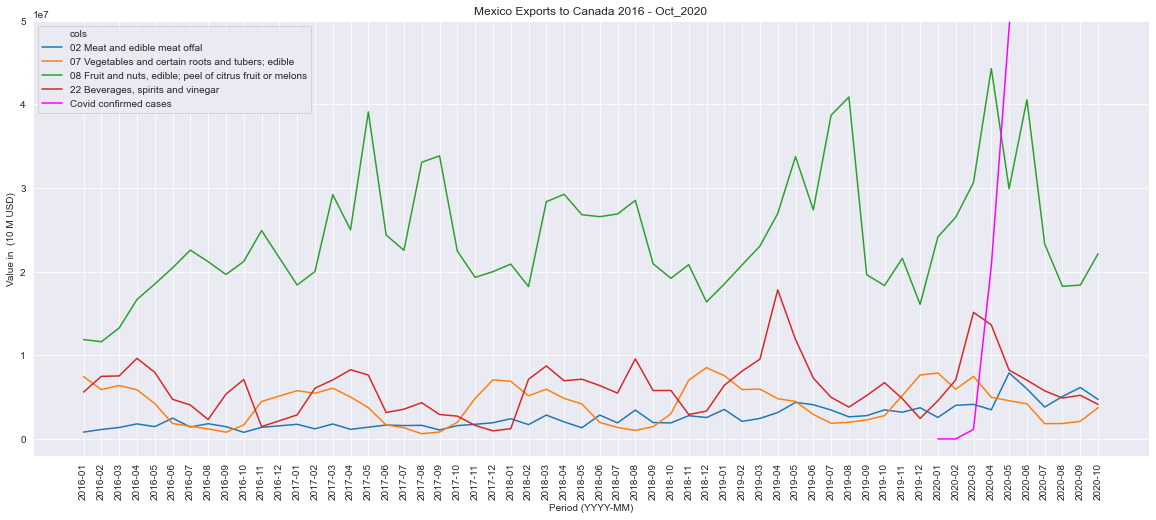

In [38]:
plot_can_mex_df =export_df['Mexico_Canada'][0].melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
can_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_mex_df)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid confirmed cases')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (10 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Mexico Exports to Canada 2016 - Oct_2020")
plt.plot(label="test2")
plt.ylim(bottom = -0.2e7, top=5e7)
plt.show()

# An increase in the meat group is perceived on may 2020

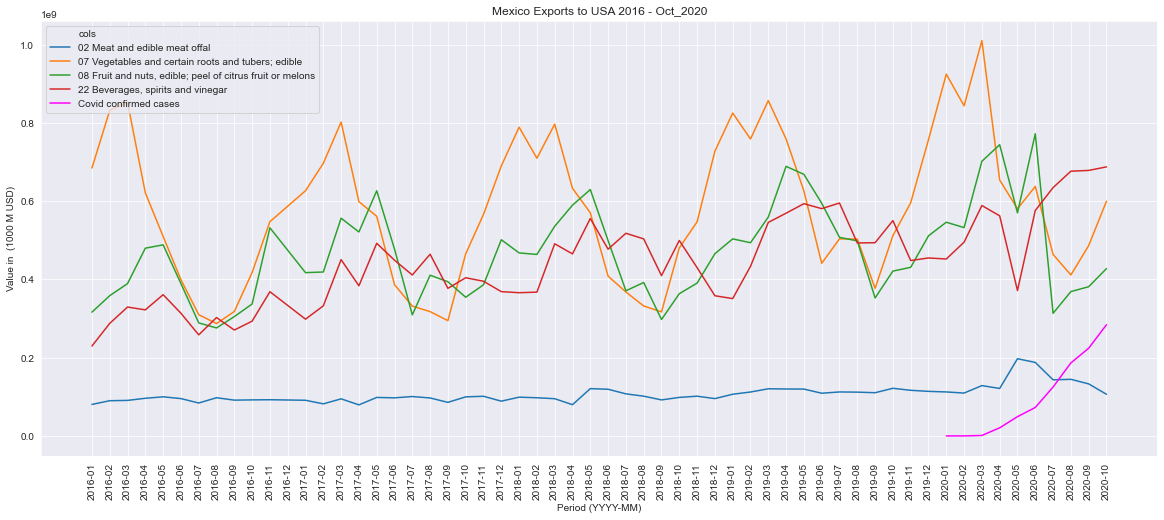

In [39]:
plot_mex_usa_df =export_df['Mexico_USA'][0].melt( 'index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
mex_usa = sns.lineplot(x= 'index', y="vals", hue='cols', data=plot_mex_usa_df)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid confirmed cases')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (1000 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Mexico Exports to USA 2016 - Oct_2020")
plt.show()

# A suden decrease on the beverages group is perceived on may 2020 which compared to previous years seems abnormal

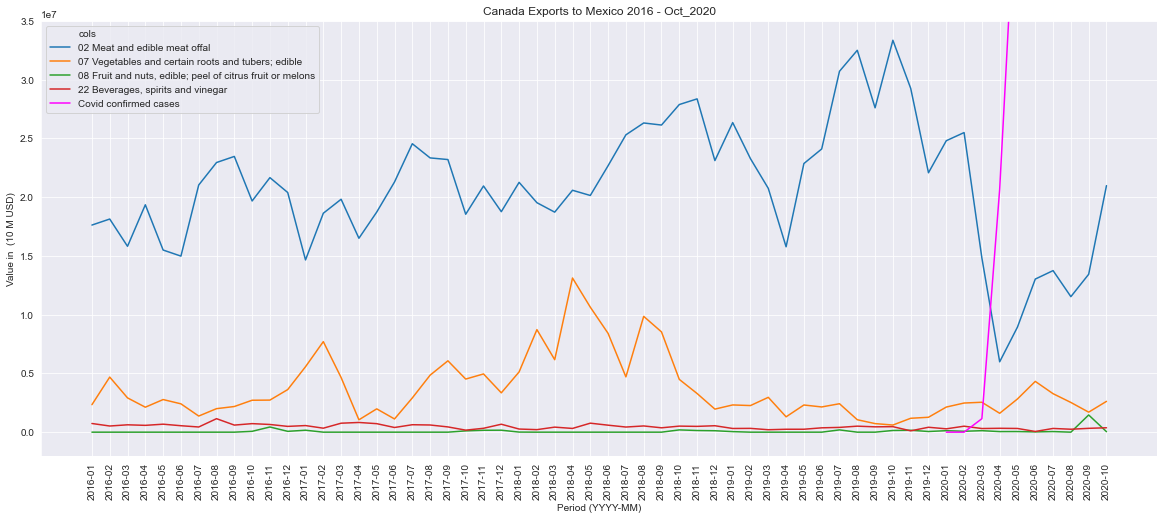

In [40]:
plot_can_mex_df =export_df['Canada_Mexico'][0].melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
can_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_mex_df)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid confirmed cases')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (10 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Canada Exports to Mexico 2016 - Oct_2020")
plt.ylim(bottom=-0.2e7, top=3.5e7)
plt.show()

# A decrease in the meat group is perceived on april 2020 becoming the lowest on the last 5 years

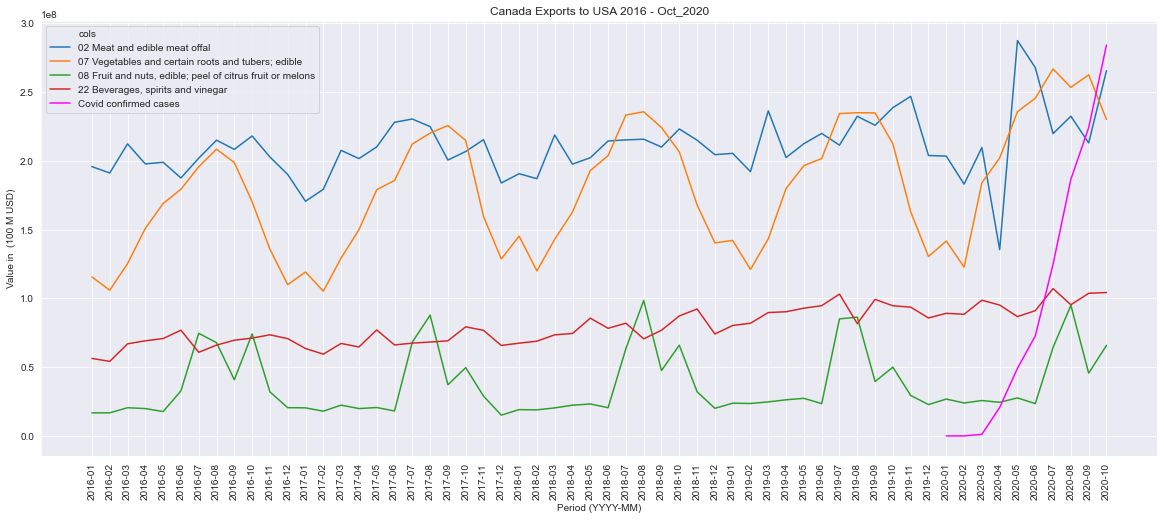

In [41]:
plot_can_usa_df =export_df['Canada_USA'][0].melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
plt.title(f"Canada Exports to USA 2016 - nov_2020")
can_usa = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_usa_df)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid confirmed cases')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.title(f"Canada Exports to USA 2016 - Oct_2020")
plt.ylabel('Value in  (100 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.show()

# A decrease in the meat group is perceived on april 2020 becoming the lowest on the last 5 years

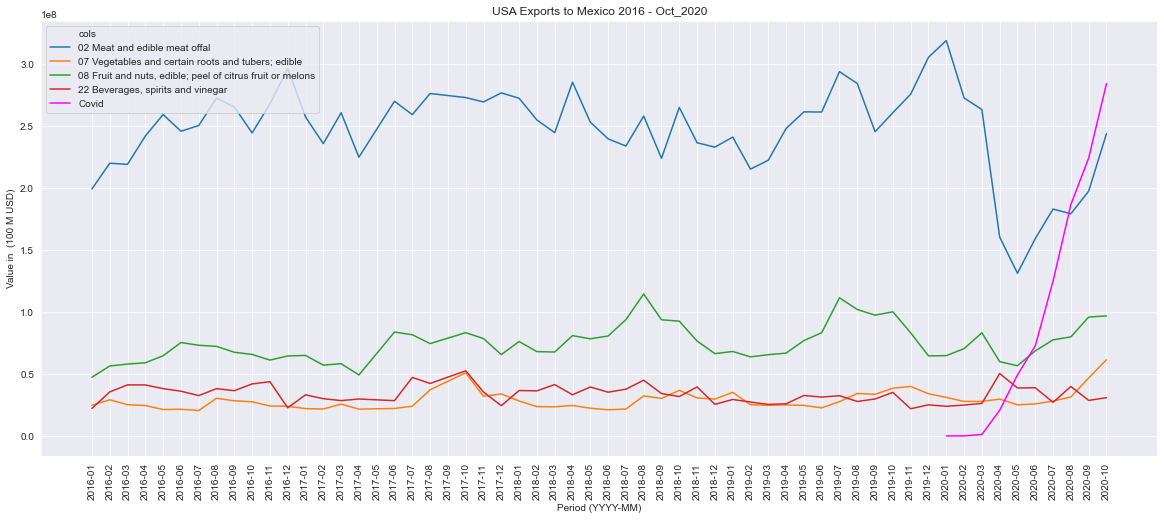

In [42]:
plot_usa_mex_df =export_df['USA_Mexico'][0].melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
usa_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_usa_mex_df)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"USA Exports to Mexico 2016 - Oct_2020")
plt.show()

# A decrease in the meat group is perceived on may 2020 becoming the lowest on the last 5 years

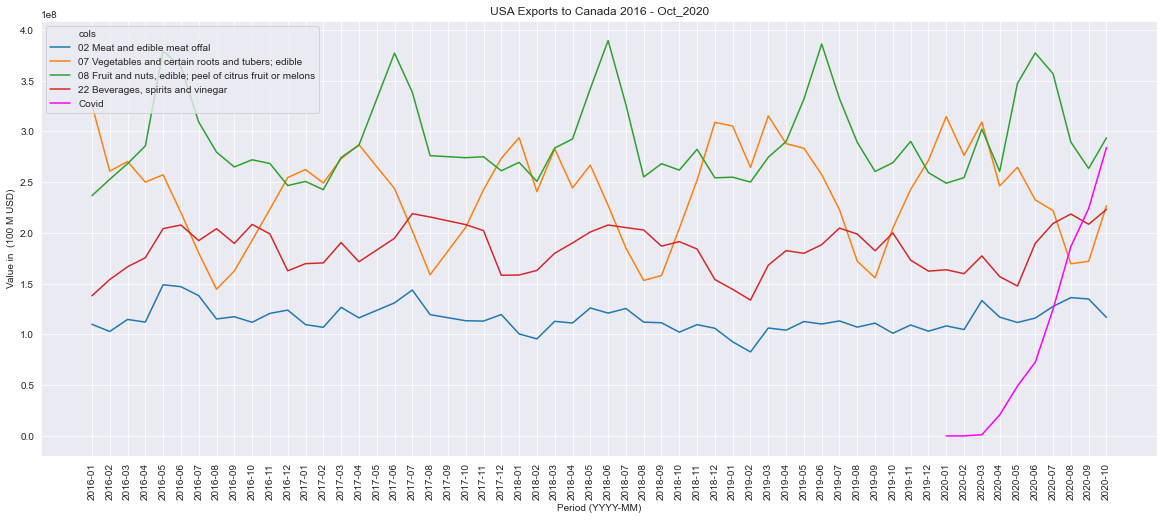

In [43]:
plot_usa_can_df =export_df['USA_Canada'][0].melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
usa_can = sns.lineplot(x="index", y="vals", hue='cols', data=plot_usa_can_df)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"USA Exports to Canada 2016 - Oct_2020")
#plt.ylim(top=300000000)
plt.show()

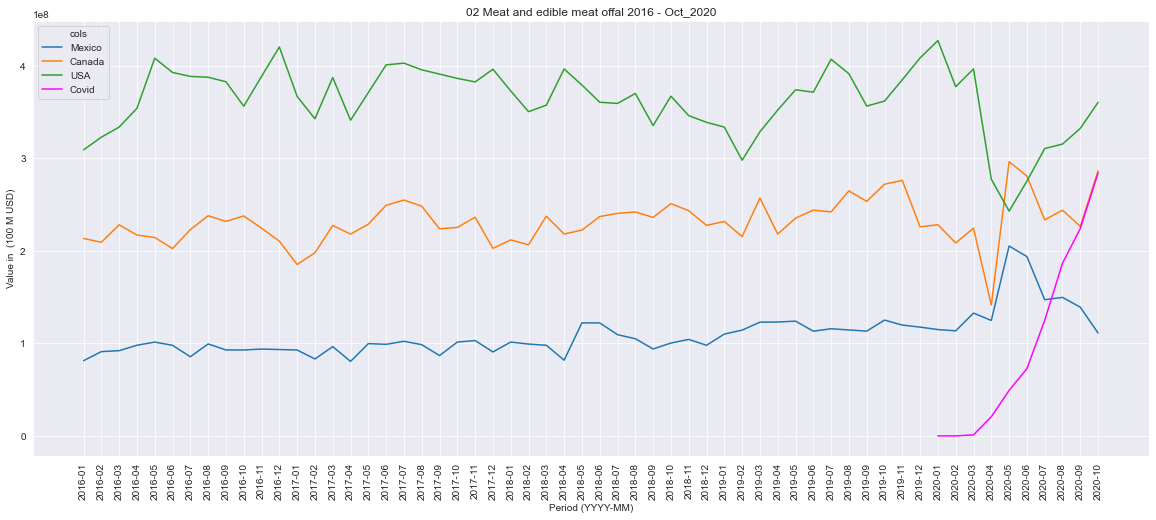

In [44]:

plot_meat =meat_exp_df.melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
meat = sns.lineplot(x="index", y="vals", hue='cols', data=plot_meat)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"02 Meat and edible meat offal 2016 - Oct_2020")
plt.show()

# on may 2020 as US Exports drop Mexico and Canada have an increase which compensate US deficit, but as US normalises so does Mexico and Canada

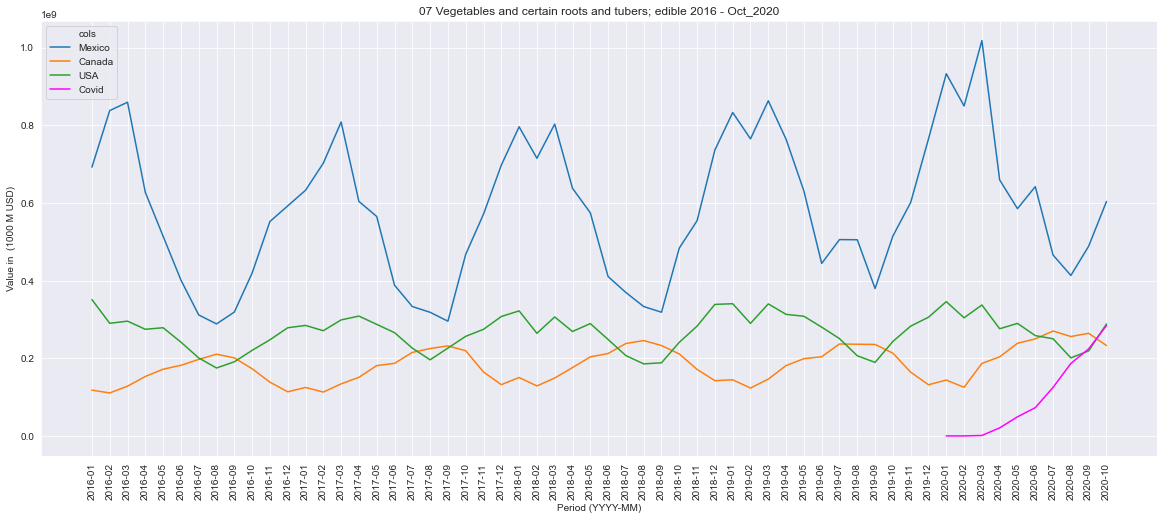

In [47]:
plot_veg =veg_exp_df.melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
meat = sns.lineplot(x="index", y="vals", hue='cols', data=plot_veg)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (1000 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"07 Vegetables and certain roots and tubers; edible 2016 - Oct_2020")
plt.show()

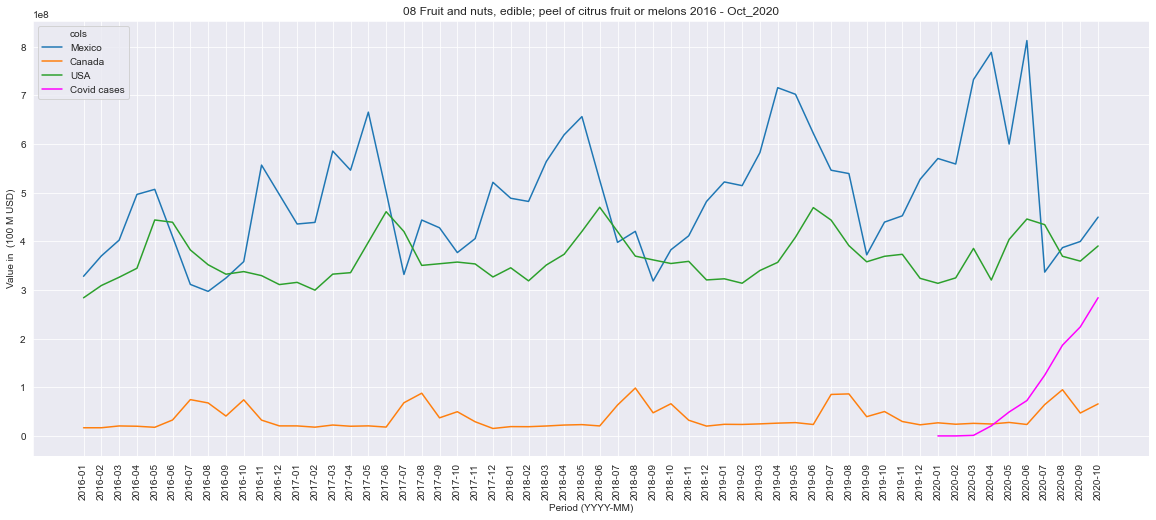

In [46]:
plot_fruit =fruit_exp_df.melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
fruit = sns.lineplot(x="index", y="vals", hue='cols', data=plot_fruit)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid cases')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"08 Fruit and nuts, edible; peel of citrus fruit or melons 2016 - Oct_2020")
plt.show()

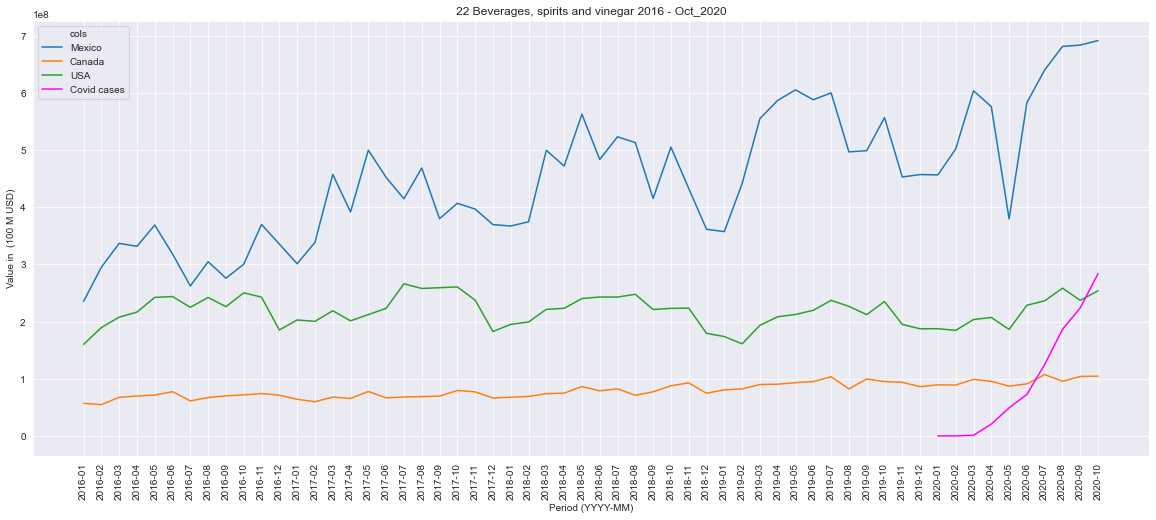

In [48]:
plot_bev =bev_exp_df.melt('index', var_name='cols',  value_name='vals')
plot_covid =na_cov_df2.melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
fruit = sns.lineplot(x="index", y="vals", hue='cols', data=plot_bev)
cov_mex = sns.lineplot(x="index", y="vals", color='magenta', data=plot_covid, label='Covid cases')
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 M USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"22 Beverages, spirits and vinegar 2016 - Oct_2020")
plt.show()

# There is an importatn drop on Mexico's exports on june 2020, wher brewing plants were closed in mexico as they where considered non esential.
# but in return, sept and october 2020 are higher than any point on the las 5 years being almost 100 M usd higher than before covid

### With the information of COVID merge the graphic with the previous generated for North America exports.

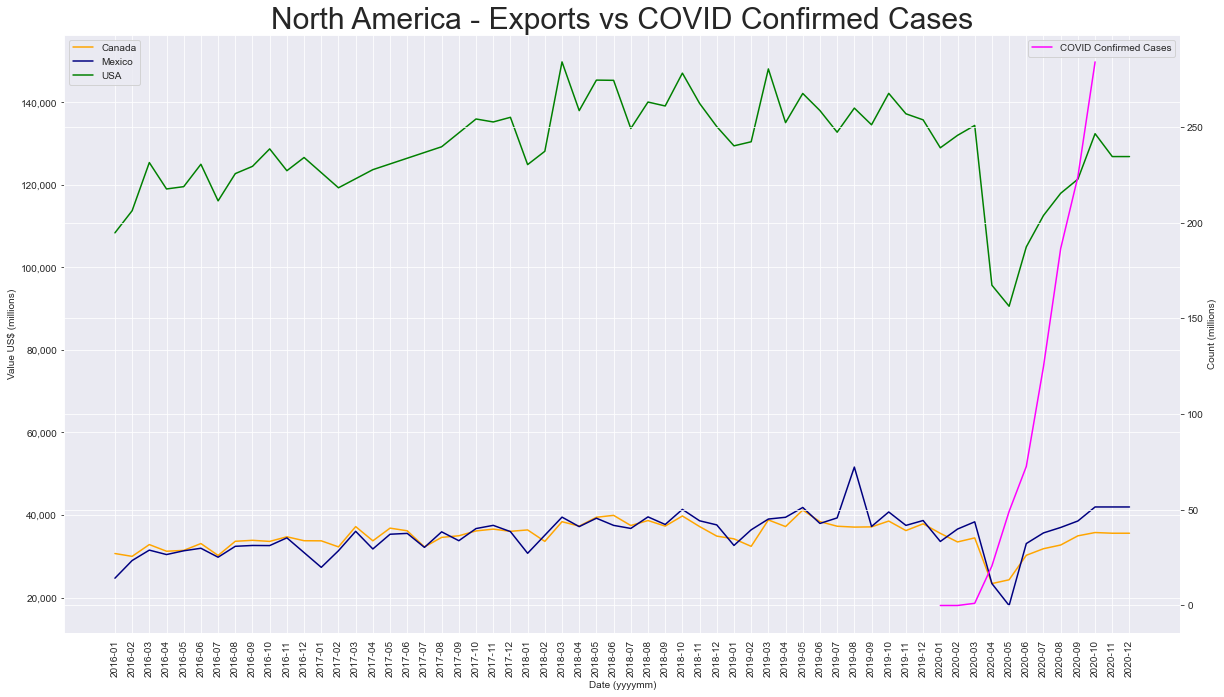

In [19]:
cov_econ_wrld =total_exp_df.join(na_cov_df2.set_index('index'), on='index')
cov_econ_wrld.set_index('index', drop= True, inplace=True)

fig, ax= plt.subplots()
ax.plot(cov_econ_wrld.index, cov_econ_wrld.Canada, color="orange" , label="Canada")
ax.plot(cov_econ_wrld.index, cov_econ_wrld.Mexico, color="navy", label="Mexico")
ax.plot(cov_econ_wrld.index, cov_econ_wrld.USA, color="green", label="USA")
ax2=ax.twinx()
ax2.plot(cov_econ_wrld.index, cov_econ_wrld.Confirmed, color="magenta", label="COVID Confirmed Cases")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
leg = ax.legend(loc='upper left')
leg2 = ax2.legend()
ax.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax.get_yticks().tolist()])
ax2.set_yticklabels(['{:,}'.format(int(x/1000000)) for x in ax2.get_yticks().tolist()])
ax.set_title('North America - Exports vs COVID Confirmed Cases', fontsize=30)
ax.set_xlabel('Date (yyyymm)')
ax.set_ylabel('Value US$ (millions)')
ax2.set_ylabel('Count (millions)')
fig.set_size_inches(20,11)
plt.savefig('exp_vs_covid.png', dpi=100)
plt.show()

# At the begining of the pandemic we could see a signigicant drop for the three countrys but it seems that as time goes by 
# they are returning back to normal, which could mean an adaptation to working conditions under covid restrictions.